In [1]:
import pandas as pd
import numpy as np
from scipy.stats import linregress
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('~/Desktop/data-science/FinalProject/2021Datav2.csv')
print(df)

        Rk             Player Nation   Pos          Squad            Comp  \
0        1         Max Aarons    ENG    DF   Norwich City  Premier League   
1        2   Yunis Abdelhamid    MAR    DF          Reims         Ligue 1   
2        3  Salis Abdul Samed    GHA    MF  Clermont Foot         Ligue 1   
3        4    Laurent Abergel    FRA    MF        Lorient         Ligue 1   
4        5        Charles Abi    FRA    FW  Saint-Étienne         Ligue 1   
...    ...                ...    ...   ...            ...             ...   
2916  2917   Martín Zubimendi    ESP    MF  Real Sociedad         La Liga   
2917  2918   Szymon ?urkowski    POL    MF         Empoli         Serie A   
2918  2919    Martin Ødegaard    NOR    MF        Arsenal  Premier League   
2919  2920        Milan ?uri?    BIH    FW    Salernitana         Serie A   
2920  2921      Filip ?uri?i?    SRB  MFFW       Sassuolo         Serie A   

       Age  Born  MP  Starts  ...   Off   Crs  TklW  PKwon  PKcon    OG  \


In [3]:
sal = pd.read_csv('~/Desktop/data-science/FinalProject/FIFA22_official_data.csv')
print(sal['Name'])

0        Bruno Fernandes
1            L. Goretzka
2              L. Suárez
3           K. De Bruyne
4               M. Acuña
              ...       
16705      18 L. Clayton
16706           �. Dobre
16707     21 Xue Qinghao
16708          A. Shaikh
16709      07 A. Censori
Name: Name, Length: 16710, dtype: object


In [4]:
sal['lastname']=sal['Name'].str.split(' ').str[-1].str.lower()

In [5]:
df['lastname']= df['Player'].str.split(' ').str[-1].str.lower()

In [6]:
print(list(df))
print(list(sal))

['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', 'MP', 'Starts', 'Min', '90s', 'Goals', 'Shots', 'SoT', 'SoT%', 'G/Sh', 'G/SoT', 'ShoDist', 'ShoFK', 'ShoPK', 'PKatt', 'PasTotCmp', 'PasTotAtt', 'PasTotCmp%', 'PasTotDist', 'PasTotPrgDist', 'PasShoCmp', 'PasShoAtt', 'PasShoCmp%', 'PasMedCmp', 'PasMedAtt', 'PasMedCmp%', 'PasLonCmp', 'PasLonAtt', 'PasLonCmp%', 'Assists', 'PasAss', 'Pas3rd', 'PPA', 'CrsPA', 'PasProg', 'PasAtt', 'PasLive', 'PasDead', 'PasFK', 'TB', 'PasPress', 'Sw', 'PasCrs', 'CK', 'CkIn', 'CkOut', 'CkStr', 'PasGround', 'PasLow', 'PasHigh', 'PaswLeft', 'PaswRight', 'PaswHead', 'TI', 'PaswOther', 'PasCmp', 'PasOff', 'PasOut', 'PasInt', 'PasBlocks', 'SCA', 'ScaPassLive', 'ScaPassDead', 'ScaDrib', 'ScaSh', 'ScaFld', 'ScaDef', 'GCA', 'GcaPassLive', 'GcaPassDead', 'GcaDrib', 'GcaSh', 'GcaFld', 'GcaDef', 'Tkl', 'TklWon', 'TklDef3rd', 'TklMid3rd', 'TklAtt3rd', 'TklDri', 'TklDriAtt', 'TklDri%', 'TklDriPast', 'Press', 'PresSucc', 'Press%', 'PresDef3rd', 'PresMid3rd', 

In [7]:
dfBetter=df.loc[(df['lastname']!='williams') & (df['lastname']!='silva') & (df['lastname']!='cissé') & (df['lastname']!='brekalo') & (df['lastname']!='martínez')]
comb=pd.merge(sal, dfBetter, how="left", on=['lastname', 'lastname'])                
                
                
                
                

In [8]:
print(list(comb))

['ID', 'Name', 'Age_x', 'Photo', 'Nationality', 'Flag', 'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special', 'Preferred Foot', 'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position', 'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until', 'Height', 'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes', 'Best Position', 'Best Overall Rating', 'Release Clause', 'DefensiveAwareness', 'lastname', 'Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age_y', 'Born', 'MP', 'Starts', 'Min', '90s', 'Goals', '

In [9]:
comb['ActualGoals'] = comb['Goals']*comb['MP']
comb['ActualAssists'] = comb['Assists']*comb['MP']

In [10]:
comb['Shainvalue'] = (((comb['ActualGoals']*(2./3.)) + (comb['ActualAssists']*(1./3.)))/38.)

In [11]:
comb = comb.loc[(comb['Shainvalue']>0)]

<AxesSubplot:>

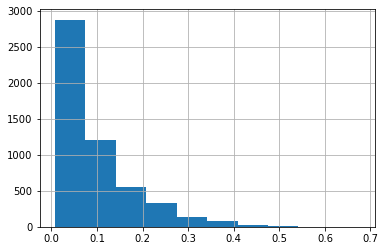

In [12]:
comb['Shainvalue']. hist()

In [13]:
def convert_wages(wage):
    out = wage.replace('€', '')
    if 'M' in out:
        out = float(out.replace('M', ''))*1000000
    elif 'K' in wage:
        out = float(out.replace('K', ''))*1000
        return float(out)

In [14]:
comb['Shainwages'] = comb['Wage'].apply(lambda x: convert_wages(x))

Text(0, 0.5, ' Shainwages ')

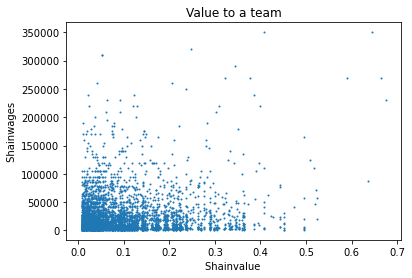

In [15]:
x = 'Shainvalue'
y = 'Shainwages'

plt.scatter(x = comb[x], y = comb[y], s = 1) 
plt.title('Value to a team')
plt.xlabel('Shainvalue ')#x axis is number of children in household
plt.ylabel(' Shainwages ')#y axis is age of head of household

In [16]:
maxwages=comb['Shainwages'].max()
comb.loc[comb['Shainwages']>maxwages/1.6][['Name','Shainvalue','Wage','lastname', 'Player', 'Position']]

,Name,Shainvalue,Wage,lastname,Player,Position
0,Bruno Fernandes,0.236842,€250K,fernandes,Bruno Fernandes,"<span class=""pos pos18"">CAM"
8,K. De Bruyne,0.407895,€350K,bruyne,Kevin De Bruyne,"<span class=""pos pos13"">RCM"
15,A. Griezmann,0.120877,€220K,griezmann,Antoine Griezmann,"<span class=""pos pos26"">LS"
40,P. Pogba,0.129825,€220K,pogba,Paul Pogba,"<span class=""pos pos9"">RDM"
41,Casemiro,0.053333,€310K,casemiro,Casemiro,"<span class=""pos pos10"">CDM"
42,L. Messi,0.248596,€320K,messi,Lionel Messi,"<span class=""pos pos23"">RW"
46,R. Lewandowski,0.665088,€270K,lewandowski,Robert Lewandowski,"<span class=""pos pos25"">ST"
47,M. Salah,0.589474,€270K,salah,Mohamed Salah,"<span class=""pos pos23"">RW"
49,Cristiano Ronaldo,0.376316,€270K,ronaldo,Cristiano Ronaldo,"<span class=""pos pos25"">ST"
53,H. Kane,0.386228,€240K,kane,Harry Kane,"<span class=""pos pos25"">ST"


In [17]:
maxshainvalue=comb['Shainvalue'].max()
comb.loc[comb['Shainvalue']>maxshainvalue/1.5][['Name','Shainvalue','Wage','lastname', 'Player', 'Comp']]

,Name,Shainvalue,Wage,lastname,Player,Comp
46,R. Lewandowski,0.665088,€270K,lewandowski,Robert Lewandowski,Bundesliga
47,M. Salah,0.589474,€270K,salah,Mohamed Salah,Premier League
113,K. Mbappé,0.675439,€230K,mbappé,Kylian Mbappé,Ligue 1
232,C. Nkunku,0.521930,€72K,nkunku,Christopher Nkunku,Bundesliga
248,M. Dembélé,0.494737,€21K,dembélé,Moussa Dembélé,Ligue 1
265,K. Benzema,0.645614,€350K,benzema,Karim Benzema,La Liga
309,W. Ben Yedder,0.636140,€88K,yedder,Wissam Ben Yedder,Ligue 1
339,E. Haaland,0.517895,€110K,haaland,Erling Haaland,Bundesliga
563,C. Immobile,0.508509,€125K,immobile,Ciro Immobile,Serie A
1397,O. Dembélé,0.494737,€165K,dembélé,Moussa Dembélé,Ligue 1


In [18]:
comb.groupby(['Comp'])['Shainvalue'].max()

Comp
Bundesliga        0.665088
La Liga           0.645614
Ligue 1           0.675439
Premier League    0.589474
Serie A           0.508509
Name: Shainvalue, dtype: float64

### Best players by Shainvalue

In [19]:
idx = comb.groupby(['Comp'])['Shainvalue'].transform(max) == comb['Shainvalue']
comb[idx][['Name','Shainvalue','Wage','lastname', 'Player', 'Comp', 'Goals', 'Assists']].sort_values(['Shainvalue'],
                                                                                                     ascending=[False])

,Name,Shainvalue,Wage,lastname,Player,Comp,Goals,Assists
113,K. Mbappé,0.675439,€230K,mbappé,Kylian Mbappé,Ligue 1,0.83,0.54
46,R. Lewandowski,0.665088,€270K,lewandowski,Robert Lewandowski,Bundesliga,1.07,0.09
265,K. Benzema,0.645614,€350K,benzema,Karim Benzema,La Liga,0.94,0.42
47,M. Salah,0.589474,€270K,salah,Mohamed Salah,Premier League,0.75,0.42
563,C. Immobile,0.508509,€125K,immobile,Ciro Immobile,Serie A,0.90,0.07


### Highest paid player in each league and their Shainvalue

In [20]:
idx = comb.groupby(['Comp'])['Shainwages'].transform(max) == comb['Shainwages']
comb[idx][['Name','Shainwages','Wage','lastname', 'Player', 'Comp', 'Goals', 'Assists', 'Shainvalue']].sort_values(
    ['Shainwages'], ascending=[False])




,Name,Shainwages,Wage,lastname,Player,Comp,Goals,Assists,Shainvalue
8,K. De Bruyne,350000.0,€350K,bruyne,Kevin De Bruyne,Premier League,0.61,0.33,0.407895
265,K. Benzema,350000.0,€350K,benzema,Karim Benzema,La Liga,0.94,0.42,0.645614
42,L. Messi,320000.0,€320K,messi,Lionel Messi,Ligue 1,0.25,0.59,0.248596
46,R. Lewandowski,270000.0,€270K,lewandowski,Robert Lewandowski,Bundesliga,1.07,0.09,0.665088
213,P. Dybala,160000.0,€160K,dybala,Paulo Dybala,Serie A,0.44,0.22,0.279825


### Linear Regression Homework

Text(0, 0.5, ' Shainwages ')

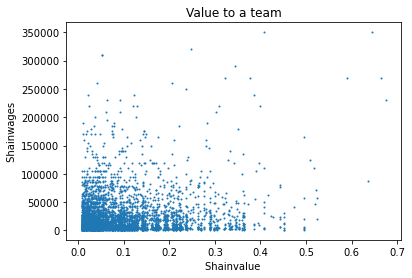

In [24]:
import matplotlib.pyplot as plt
x = 'Shainvalue'
y = 'Shainwages'

plt.scatter(x = comb[x], y = comb[y], s = 1) 
plt.title('Value to a team')
plt.xlabel('Shainvalue ')#x axis is number of children in household
plt.ylabel(' Shainwages ')#y axis is age of head of household

In [26]:
import statsmodels.api as sm

In [28]:
x_ary = comb['Shainwages']
x_with_cnst = sm.add_constant(x_ary)
model = sm.OLS(comb['Shainvalue'], x_with_cnst)
results = model.fit()
b,m = results.params
print(m)
print(b)

MissingDataError: exog contains inf or nans